In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [142]:
def distance_matrixx(num_cities):
    distance_matrix = np.random.randint(1, 100, size=(num_cities, num_cities))
    distance_matrix = (distance_matrix + distance_matrix.T) / 2
    np.fill_diagonal(distance_matrix, 0)

    city_labels = [chr(ord('A') + i) for i in range(num_cities)]
    df = pd.DataFrame(distance_matrix, index=city_labels, columns=city_labels)
    print("Distance Matrix with City Labels:")
    print(df)

    return distance_matrix

In [143]:
def generate_population(num_cities, population_size):
    population = [np.random.permutation(num_cities) for _ in range(population_size)]
    return population

In [144]:
def calculate_population_cost(population, distance_matrix):
    costs = []
    for tour in population:
        cost = 0
        for i in range(len(tour) - 1):
            cost += distance_matrix[tour[i], tour[i+1]]
        cost += distance_matrix[tour[-1], tour[0]]  # Returning to the start city
        costs.append(cost)
    return np.array(costs)

In [145]:
def roulette_wheel_selection(costs, population):
    fitness = 1 / costs
    probabilities = fitness / np.sum(fitness)
    selected_indices = np.random.choice(len(population), size=len(population), p=probabilities)
    return [population[i] for i in selected_indices]

In [146]:
def crossover_population(selected_population):
    next_population = []
    for i in range(0, len(selected_population), 2):
        if i + 1 < len(selected_population):
            # Perform crossover between two parents
            cut = np.random.randint(1, len(selected_population[i]))
            parent1, parent2 = selected_population[i], selected_population[i+1]
            child1 = np.concatenate((parent1[:cut], parent2[cut:]))
            child2 = np.concatenate((parent2[:cut], parent1[cut:]))
            next_population.extend([child1, child2])
        else:
            next_population.append(selected_population[i])
    return next_population

In [147]:
def mutate_population(population, mutation_rate):
    for i in range(len(population)):
        if np.random.rand() < mutation_rate:
            swap_idx = np.random.choice(len(population[i]), 2, replace=False)
            population[i][swap_idx[0]], population[i][swap_idx[1]] = population[i][swap_idx[1]], population[i][swap_idx[0]]
    return population


In [148]:
def genetic_algorithm(num_cities, population_size, num_iterations, distance_matrix, mutation_rate=0.1):
    population = generate_population(num_cities, population_size)
    costs_history = []
    prev_min_cost = None
    convergence_iteration = None

    for iteration in range(1, num_iterations + 1):
        # Calculate cost for each individual in the population
        costs = calculate_population_cost(population, distance_matrix)

        # Record the minimum cost of this generation
        min_cost = np.min(costs)
        costs_history.append(min_cost)

        # Print the cost for this iteration
        print(f"Iteration {iteration}: Minimum Cost = {min_cost}")

        # Select population based on fitness (cost)
        selected_population = roulette_wheel_selection(costs, population)

        # Perform crossover and mutation
        crossed_population = crossover_population(selected_population)
        population = mutate_population(crossed_population, mutation_rate)

        # Convergence check
        if prev_min_cost is not None and np.isclose(min_cost, prev_min_cost, atol=1e-4):
            convergence_iteration = iteration
            print(f"Algorithm converged at iteration {iteration}")
            break

        prev_min_cost = min_cost

    # Plot the convergence graph
    plt.figure(figsize=(10, 6))
    plt.plot(costs_history, label="Minimum Cost")
    plt.title("Convergence of Genetic Algorithm")
    plt.xlabel("Iteration")
    plt.ylabel("Minimum Tour Cost")
    plt.axvline(x=convergence_iteration, color='r', linestyle='--', label=f"Convergence at iteration {convergence_iteration}")
    plt.legend()
    plt.grid(True)
    plt.show()

    return population, min_cost, convergence_iteration



Enter the number of cities: 45
Enter the population size: 45
Enter the mutation rate (default is 0.1): 0.3
Distance Matrix with City Labels:
      A     B     C     D     E     F     G     H     I     J  ...     d  \
A   0.0  50.0  71.0  39.0  38.5  45.5  87.5  48.0  18.0  56.0  ...  44.0   
B  50.0   0.0  90.0  52.0  62.5  37.0  60.0  67.0  49.0  44.5  ...  45.0   
C  71.0  90.0   0.0  64.0  42.5  83.5  42.0  85.5  49.5  74.5  ...  86.0   
D  39.0  52.0  64.0   0.0  34.0  43.0  27.5  85.0  25.0  28.5  ...  16.5   
E  38.5  62.5  42.5  34.0   0.0  33.5  44.5  28.5  12.0  85.5  ...  98.0   
F  45.5  37.0  83.5  43.0  33.5   0.0  65.5  48.5  80.0  22.0  ...  19.0   
G  87.5  60.0  42.0  27.5  44.5  65.5   0.0  42.5  14.5  42.5  ...  54.5   
H  48.0  67.0  85.5  85.0  28.5  48.5  42.5   0.0  35.0  35.5  ...  54.5   
I  18.0  49.0  49.5  25.0  12.0  80.0  14.5  35.0   0.0  69.5  ...  34.5   
J  56.0  44.5  74.5  28.5  85.5  22.0  42.5  35.5  69.5   0.0  ...  16.0   
K  53.5  84.0  35.0  36

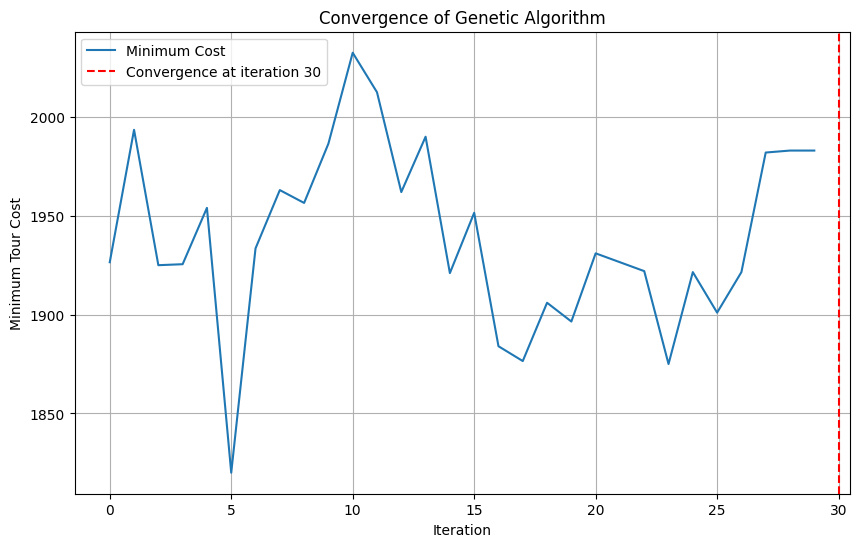

Final Population and Cost after Convergence:
Final Minimum Tour Cost: 1983.0
The algorithm converged at iteration 30.


In [149]:
def user_defined_genetic_algorithm():
    num_cities = int(input("Enter the number of cities: "))
    population_size = int(input("Enter the population size: "))
    mutation_rate = float(input("Enter the mutation rate (default is 0.1): "))

    # Generate and print the distance matrix
    distance_matrix = distance_matrixx(num_cities)

    # Run the genetic algorithm with user-defined input
    population, final_cost, convergence_iteration = genetic_algorithm(
        num_cities=num_cities,
        population_size=population_size,
        num_iterations=10000,  # Iterations can continue until convergence
        distance_matrix=distance_matrix,
        mutation_rate=mutation_rate
    )

    # Display final result
    print("Final Population and Cost after Convergence:")
    print(f"Final Minimum Tour Cost: {final_cost}")
    if convergence_iteration:
        print(f"The algorithm converged at iteration {convergence_iteration}.")
    else:
        print(f"The algorithm did not converge within the allowed iterations.")

# Call the user-defined function
user_defined_genetic_algorithm()